In [222]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 


In [223]:
df=pd.read_excel('online_retail_II.xlsx')

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [224]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [225]:
df.shape

(525461, 8)

In [226]:
df.isnull().sum() #so their is no null remains in the system 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [227]:
df.head(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom


In [228]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [229]:
df['Customer ID'].unique().shape #so there are only 4383 k customers of this organization 


(4384,)

In [230]:
#the invoice id starting with C means Cancelled order 
#lets check them 
df[df['Invoice'].astype(str).str.startswith('C')]
#we have to remove all the cancelled order from this list 
df=df[~df['Invoice'].astype(str).str.startswith('C')] #here we remove all the cancelled orders 


In [231]:
df.shape
#lets also drop the null customer id 

df=df[df['Customer ID'].notnull()]
# df=df[~df['Customer ID'].isna()] #also can do like this

In [232]:
df.shape

(407695, 8)

In [233]:
#we have successfully remvoeall the null customer id's and also
#remvoed all the cancelled order 
df.isnull().sum() #their is no null values

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [234]:
#lets check the each column seperately and see its importance to make the prediction
#stock code is not helpful lets drop it 
# df.drop(columns=['StockCode'],inplace=True)
#invoice is also not useful 
# df.drop(columns=['Invoice'],inplace=True)

In [235]:
#in the quantity column some values are negative lets remove them 
df=df[df['Quantity']>0]

In [236]:
#lets check the data type of all the columns
# df.info()
df['Customer ID']=df['Customer ID'].astype('int')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  int64         
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 28.0+ MB


In [237]:
df['total_amount']=df['Quantity']*df['Price']

In [238]:
#lets remove the stock code 
df.drop(columns=['StockCode'],inplace=True)

In [239]:
df.head()
df=df.rename(columns={'Invoice':'Invoice_no','Customer ID':'Customer_id'}) #wwe have to pass it in columns arguments 

df.head()

,Invoice_no,Description,Quantity,InvoiceDate,Price,Customer_id,Country,total_amount
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [240]:
# Set reference date (last invoice date + 1 day)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Compute RFM metrics
rfm = df.groupby('Customer_id').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Invoice_no': 'nunique',  # Frequency (unique invoices)
    'total_amount': 'sum'     # Monetary (total revenue)
}).rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice_no': 'Frequency',
    'total_amount': 'Monetary'
})

# Calculate Average Order Value (AOV)
rfm['AOV'] = rfm['Monetary'] / rfm['Frequency']

# Define LTV (for simplicity, we'll assume Monetary = LTV)
rfm['LTV'] = rfm['Monetary']

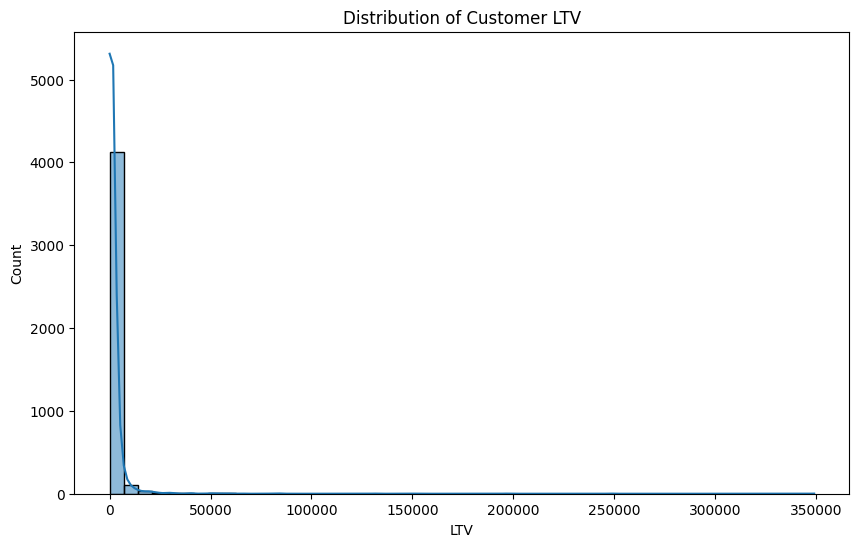

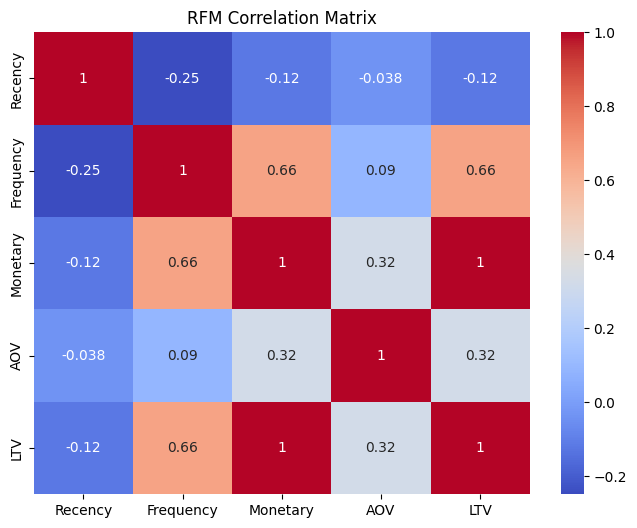

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of LTV
plt.figure(figsize=(10, 6))
sns.histplot(rfm['LTV'], bins=50, kde=True)
plt.title('Distribution of Customer LTV')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Matrix')
plt.show()

In [242]:
rfm.head()
#here we have made the input columns and the target column 
#lets train the model on it


,Recency,Frequency,Monetary,AOV,LTV
Customer_id,,,,,
12346,165,11,372.86,33.896364,372.86
12347,3,2,1323.32,661.660000,1323.32
12348,74,1,222.16,222.160000,222.16
12349,43,3,2671.14,890.380000,2671.14
12351,11,1,300.93,300.930000,300.93


In [243]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Features & Target
X = rfm[['Recency', 'Frequency', 'AOV']]
y = rfm['LTV']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model1 = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model1.fit(X_train, y_train)

# Evaluate
y_pred = xgb_model1.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

MAE: 673.5060126492311
RMSE: 6848.2082570841285


In [244]:
#lets take a prediction and see how much difference in the value of the ltv of a customers 
xgb_model1.predict([[165,11,33.89]])
xgb_model1.predict([[3,2,661.6]]) #peformance of our model is really bad 
#lets try to improve the performance of it 


array([1304.8208], dtype=float32)

In [245]:
# Predict LTV for all customers
rfm['Predicted_LTV_model1'] = xgb_model1.predict(X)

# Create segments (quartiles)
rfm['Segment'] = pd.qcut(rfm['Predicted_LTV_model1'], q=4, labels=['Low', 'Medium', 'High', 'VIP'])

# Analyze segments
segment_stats = rfm.groupby('Segment').agg({
    'Predicted_LTV_model1': ['mean', 'count'],
    'Recency': 'mean',
    'Frequency': 'mean',
    'AOV': 'mean'
})
print(segment_stats)

        Predicted_LTV_model1           Recency  Frequency         AOV
                        mean count        mean       mean        mean
Segment                                                              
Low               178.353790  1081  150.844588   1.219241  158.666740
Medium            476.427429  1080  106.196296   2.011111  293.092299
High             1132.735229  1074   68.205773   3.765363  390.995245
VIP              6596.764160  1079   39.598703  10.825765  670.379839


C:\Users\aashi\AppData\Local\Temp\ipykernel_20864\3771602088.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_stats = rfm.groupby('Segment').agg({


In [246]:

# Apply log transformation to LTV
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Train model on log-transformed target
# 
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train_log)

# Predict and reverse transform
y_pred_log = xgb_model.predict(X_test)
y_pred = np.expm1(y_pred_log) #getting the actual  value after from log output 
rfm['Predicted_LTV_model2']=np.expm1(xgb_model.predict(X))
# Recalculate metrics
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

MAE: 382.29470626038494
RMSE: 4113.670421001417


In [247]:
rfm.head()
#lets convet the ltv ino he log
rfm['log_ltv']=np.log1p(rfm['LTV']) #storing the actual ltv into the logltv after the log transformation 


In [265]:
rfm.head()

,Recency,Frequency,Monetary,AOV,LTV,Predicted_LTV_model1,Segment,Predicted_LTV_model2,log_ltv,Predicted_LTV
Customer_id,,,,,,,,,,
12346,165,11,372.86,33.896364,372.86,408.642059,Medium,373.239075,5.923881,373.239075
12347,3,2,1323.32,661.660000,1323.32,1304.820801,High,1322.587769,7.188654,1322.587769
12348,74,1,222.16,222.160000,222.16,223.315887,Low,223.232834,5.407889,223.232834
12349,43,3,2671.14,890.380000,2671.14,2669.295898,VIP,2702.383301,7.890635,2702.383301
12351,11,1,300.93,300.930000,300.93,291.776306,Low,298.045258,5.710195,298.045258


In [262]:
#here in the above dataframe we can see the accuracy of our model increases 
#lets increases the number of estimater and see what happens

# Apply log transformation to LTV
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test) 

# Train model on log-transformed target
# 
xgb_model3 = XGBRegressor(objective='reg:squarederror', n_estimators=350)
xgb_model3.fit(X_train, y_train_log)

# Predict and reverse transform
y_pred_log = xgb_model3.predict(X_test)
y_pred = np.expm1(y_pred_log) #getting the actual  value after from log output 
rfm['Predicted_LTV']=np.expm1(xgb_model.predict(X))
# Recalculate metrics
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
#here we can see the accuracy is increased but very small 
#after the n_estimators=300 the accuracy is not increasing 
#so lets store this value as the prdicted vlaues
#and this is our main model for the prediction of the ltv 


MAE: 377.78784343939174
RMSE: 4112.666823788793


In [284]:

#LETS TRY RANDOM FOREST ALGORITHM AND CHECK THE PERFORMACNE OF THE DATASET 
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=None)
rf.fit(X_train,y_train)

rf_pred=rf.predict(X_test)
print('MSE is ',mean_absolute_error(y_test,rf_pred))
print('RMSE is ',np.sqrt(mean_squared_error(y_test,rf_pred)))
#here we can see the random forest model is not working well 
#so here we only use our xgboost model with 300 estimators 

MSE is  475.36577698725387
RMSE is  5005.240287205208


MSE is  486.1508272421784
RMSE is  5141.129724538158


In [250]:
rfm.shape

(4314, 9)

In [251]:
# # 1. Time since first purchase (customer tenure)
# first_purchase = df.groupby('Customer_id')['InvoiceDate'].min()
# rfm['Tenure'] = (reference_date - first_purchase).dt.days

# # 2. Purchase frequency (purchases per month)
# rfm['Purchase_Freq'] = rfm['Frequency'] / (rfm['Tenure']/30)  # per month

# # 3. Add country as a feature (if available)
# # df['Country'] = ... # from original data
# # rfm = rfm.join(df.drop_duplicates('CustomerID').set_index('CustomerID')['Country'])
# # Then one-hot encode if using

# # Update features
# X = rfm[['Recency', 'Frequency', 'AOV', 'Tenure', 'Purchase_Freq']]

In [263]:
import joblib
joblib.dump(xgb_model3, 'ltv_xgboost_model.pkl')

['ltv_xgboost_model.pkl']

In [264]:
rfm[['Predicted_LTV', 'Segment']].to_csv('customer_ltv_predictions.csv')